# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [3]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/A01770083//"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [6]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [ ]:
# Dataset url
url = Ruta + "datasets/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url )


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print the dataframe
df

In [ ]:
# get the number of observations and variables
# Number of rows
Nrows = df.shape[0]
print("Rows     : " ,Nrows)

# Number of columns
Nrows = df.shape[1]
print("Columns  : " ,Nrows)

Rows     :  1024
Columns  :  6


2. Drop rows with any missing values


In [ ]:
# Drop rows with NaN values if existing
df.dropna().describe()

# Print the new shape


,x1,x2,x3,x4,x5,x6
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,-1.306552,-0.813203,2.723793,5.034164,-0.750993,-1.503553
std,5.078200,6.961691,5.749202,2.488843,6.681293,5.037398
min,-13.103651,-15.006876,-10.997864,-3.320707,-14.659036,-13.428455
25%,-4.968442,-6.039456,-1.972076,3.370508,-5.716128,-5.987090
50%,-0.703749,-1.386716,4.105811,4.957425,-0.750850,-0.913367
75%,2.314061,3.803313,7.603972,6.627528,4.694809,3.031108
max,10.595493,15.136358,13.951990,13.237068,13.636751,9.805784


3. Scatterplot




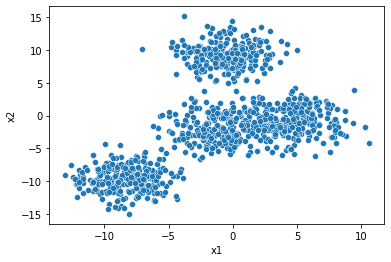

In [15]:
# Scatterplot of x1 and x2
sns.scatterplot(data = df, x= "x1" , y= "x2")
plt.show()

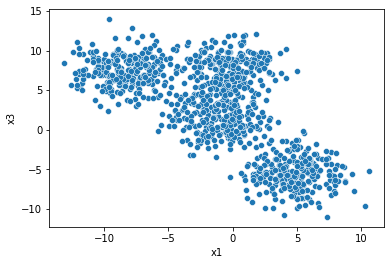

In [16]:
# Scatterplot of x1 and x3
sns.scatterplot(data = df, x= "x1" , y= "x3")
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

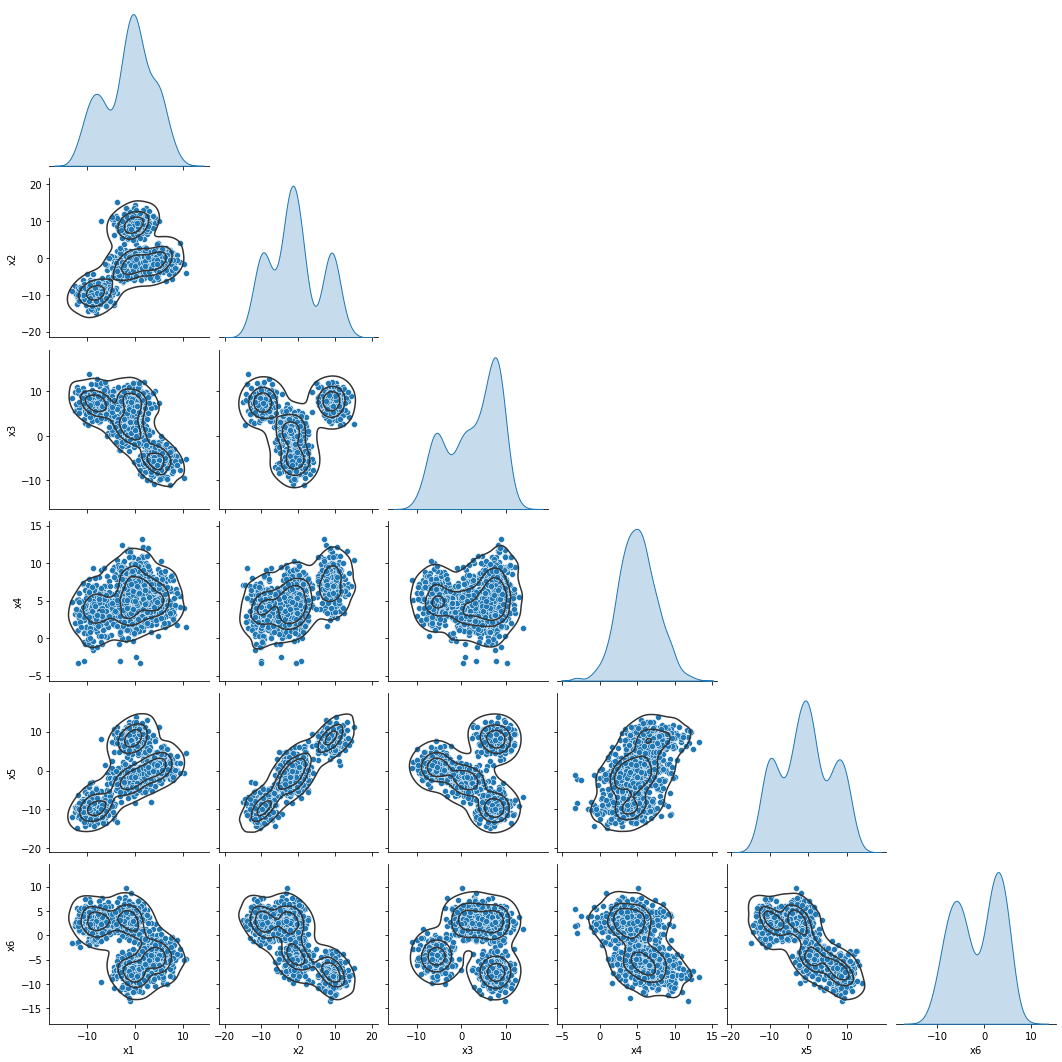

In [18]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner = True, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [40]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3      # Let's assume there are 2,3,4,5...? clusters/groups

# Creates the KMeans box/object
km = KMeans(n_clusters = K, n_init = "auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)
#yestimated = km.fit_predict(df[['x1','x2']])
#yestimated = km.fit_predict(df[['x1','x3']])


# Print estimated cluster of each point in the dataset
yestimated


array([2, 1, 1, ..., 1, 2, 2], dtype=int32)

In [41]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated
df

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,2
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,1
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,1
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,1
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,2
...,...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649,2
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336,0
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100,1
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975,2


In [42]:
# Print the labels/names of the existing clusters
df.yestimated.unique()

array([2, 1, 0], dtype=int32)

In [43]:
# Cluster centroides
km.cluster_centers_


array([[-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451,  1.        ],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  0.        ],
       [ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018,  2.        ]])

In [44]:
# Sum of squared error (sse) of the final model
km.inertia_

44295.1263266536

In [45]:
# The number of iterations required to converge
km.n_iter_

12

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

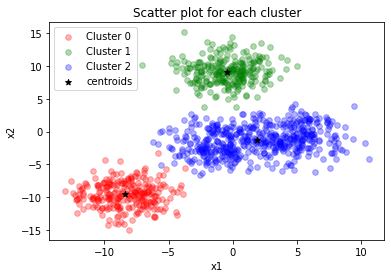

In [51]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated == 0]
df2 = df[df.yestimated == 1]
df3 = df[df.yestimated == 2]

# Scatter plot of each cluster

plt.scatter(df1.x1, df1.x2, label = 'Cluster 0', c = 'r' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df2.x1, df2.x2, label = 'Cluster 1', c = 'g' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df3.x1, df3.x2, label = 'Cluster 2', c = 'b' , marker = 'o', s = 32, alpha = 0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black',marker ='*',label = 'centroids')

plt.title("Scatter plot for each cluster")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [53]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters = k, n_init = "auto")
  km.fit_predict(df[['x1','x2']])
  sse.append(km.inertia_)

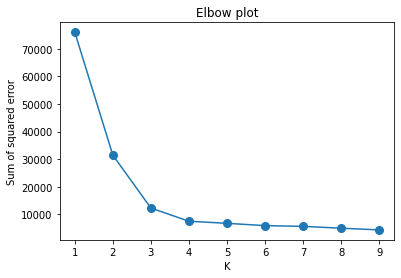

In [54]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-',markersize = 8)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Sum of squared error")

plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset




In [7]:
# Dataset url
urlIris = Ruta + "datasets/iris/iris2.csv"

# Load the dataset
dfIris = pd.read_csv(urlIris )

In [8]:
dfIris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# get the number of observations and variables
# Number of rows
Nrows = dfIris.shape[0]
print("Rows     : " ,Nrows)

# Number of columns
Nrows = dfIris.shape[1]
print("Columns  : " ,Nrows)

Rows     :  150
Columns  :  5


1. Do clustering with the iris flower dataset to form clusters using as features the four features


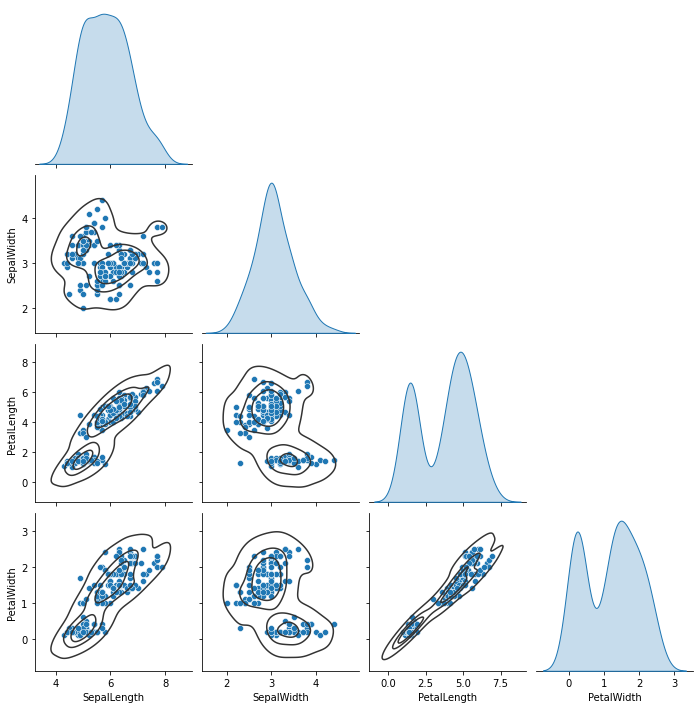

In [10]:
g = sns.pairplot(dfIris, corner = True, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

In [12]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3      # Let's assume there are 2,3,4,5...? clusters/groups

# Creates the KMeans box/object
km = KMeans(n_clusters = K, n_init = "auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(dfIris[["SepalLength",	"SepalWidth",	"PetalLength",	"PetalWidth"]])

#yestimated = km.fit_predict(df[['x1','x2']])
#yestimated = km.fit_predict(df[['x1','x3']])

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
dfIris['yestimated'] = yestimated
dfIris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [14]:
# Print the labels/names of the existing clusters
dfIris.yestimated.unique()

array([1, 0, 2], dtype=int32)

In [15]:
# Cluster centroides
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
# Sum of squared error (sse) of the final model
km.inertia_

78.851441426146

In [17]:
# The number of iterations required to converge
km.n_iter_

5

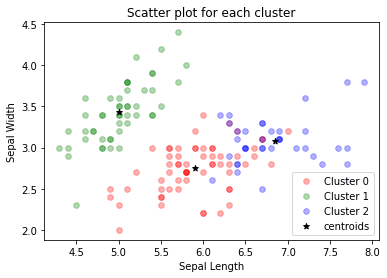

In [19]:
# Get a dataframe with the data of each clsuter
df1 = dfIris[dfIris.yestimated == 0]
df2 = dfIris[dfIris.yestimated == 1]
df3 = dfIris[dfIris.yestimated == 2]

# Scatter plot of each cluster

plt.scatter(df1.SepalLength, df1.SepalWidth, label = 'Cluster 0', c = 'r' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df2.SepalLength, df2.SepalWidth, label = 'Cluster 1', c = 'g' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df3.SepalLength, df3.SepalWidth, label = 'Cluster 2', c = 'b' , marker = 'o', s = 32, alpha = 0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black',marker ='*',label = 'centroids')

plt.title("Scatter plot for each cluster")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [20]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters = k, n_init = "auto")
  km.fit_predict(dfIris[['SepalLength','SepalWidth']])
  sse.append(km.inertia_)


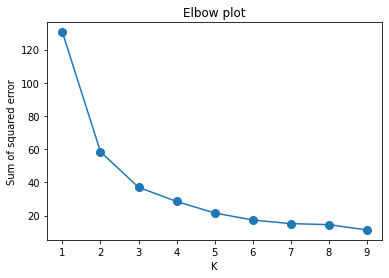

In [21]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-',markersize = 8)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Sum of squared error")

plt.show()


2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features


In [23]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3      # Let's assume there are 2,3,4,5...? clusters/groups

# Creates the KMeans box/object
km = KMeans(n_clusters = K, n_init = "auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
#yestimated = km.fit_predict(df)
yestimated = km.fit_predict(dfIris[['PetalLength','PetalWidth']])
#yestimated = km.fit_predict(df[['x1','x3']])


In [24]:
# Print estimated cluster of each point in the dataset
yestimated

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
dfIris['yestimated'] = yestimated
dfIris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [26]:
# Print the labels/names of the existing clusters
dfIris.yestimated.unique()

array([2, 0, 1], dtype=int32)

In [27]:
# Cluster centroides
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.462     , 0.246     ]])

In [28]:
# Sum of squared error (sse) of the final model
km.inertia_

31.37135897435897

In [29]:
# The number of iterations required to converge
km.n_iter_

5

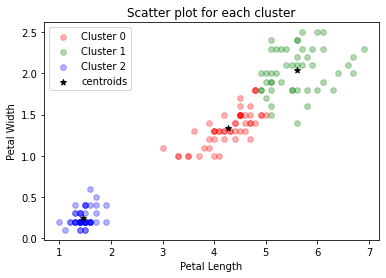

In [32]:
# Get a dataframe with the data of each clsuter
df1 = dfIris[dfIris.yestimated == 0]
df2 = dfIris[dfIris.yestimated == 1]
df3 = dfIris[dfIris.yestimated == 2]

# Scatter plot of each cluster

plt.scatter(df1.PetalLength, df1.PetalWidth, label = 'Cluster 0', c = 'r' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df2.PetalLength, df2.PetalWidth, label = 'Cluster 1', c = 'g' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df3.PetalLength, df3.PetalWidth, label = 'Cluster 2', c = 'b' , marker = 'o', s = 32, alpha = 0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black',marker ='*',label = 'centroids')

plt.title("Scatter plot for each cluster")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


In [35]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters = k, n_init = "auto")
  km.fit_predict(dfIris[['PetalLength','PetalWidth']])
  sse.append(km.inertia_)

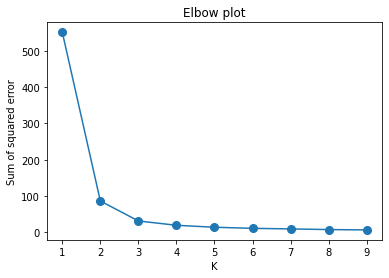

In [36]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-',markersize = 8)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Sum of squared error")

plt.show()

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features


In [38]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3      # Let's assume there are 2,3,4,5...? clusters/groups

# Creates the KMeans box/object
km = KMeans(n_clusters = K, n_init = "auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
#yestimated = km.fit_predict(df)
#yestimated = km.fit_predict(df[['x1','x2']])
yestimated = km.fit_predict(dfIris[['SepalLength','SepalWidth']])

In [39]:
# Print estimated cluster of each point in the dataset
yestimated

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [41]:
dfIris['yestimated'] = yestimated
dfIris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [42]:
# Print the labels/names of the existing clusters
dfIris.yestimated.unique()

array([2, 1, 0], dtype=int32)

In [43]:
# Cluster centroides
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [44]:
# Sum of squared error (sse) of the final model
km.inertia_

37.05070212765956

In [45]:
# The number of iterations required to converge
km.n_iter_

10

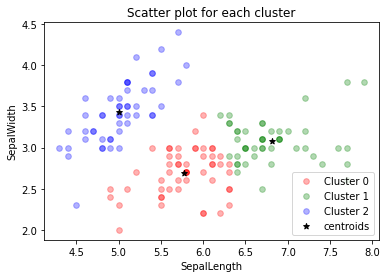

In [46]:
# Get a dataframe with the data of each clsuter
df1 = dfIris[dfIris.yestimated == 0]
df2 = dfIris[dfIris.yestimated == 1]
df3 = dfIris[dfIris.yestimated == 2]

# Scatter plot of each cluster

plt.scatter(df1.SepalLength, df1.SepalWidth, label = 'Cluster 0', c = 'r' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df2.SepalLength, df2.SepalWidth, label = 'Cluster 1', c = 'g' , marker = 'o', s = 32, alpha = 0.3)
plt.scatter(df3.SepalLength, df3.SepalWidth, label = 'Cluster 2', c = 'b' , marker = 'o', s = 32, alpha = 0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black',marker ='*',label = 'centroids')

plt.title("Scatter plot for each cluster")
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

In [48]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters = k, n_init = "auto")
  km.fit_predict(dfIris[['SepalLength','SepalWidth']])
  sse.append(km.inertia_)

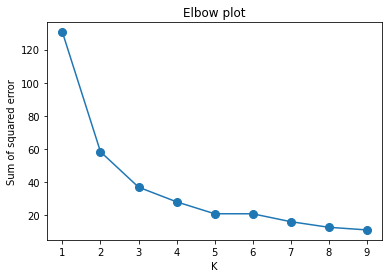

In [49]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-',markersize = 8)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Sum of squared error")

plt.show()

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

